- Simple Linear Regression (Estimate coefficients for single feature)
- Linear Regression using Stochastic Gradient Descent

### Simple Linear Regression Tutorial for Machine Learning
https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/



In [1]:
x = [1,2,4,3,5]
y = [1,3,3,2,5]

Prediction using linear regression: $\hat{y}=b_{0}+b_{1}x$. Estimate the coefficients $b_{0}$ and $b_{1}$ to minimize the error $\varepsilon=\hat{y}-y$ in prediction.

Use the least square approach to minimize the problem: $f(b_{0},b_{1})=\sum\varepsilon^{2}=\sum(\hat{y}-b_{0}-b_{1}x)^{2}$. Set the derivatives of the function with respect to $b_{0}$ and $b_{1}$ as 0 to find the values of $b_{0}$ and $b_{1}$. 

$\frac{\partial f}{\partial b_{0}}=0\Rightarrow nb_{0}=\sum y-b_{1}\sum x\Rightarrow b_{0}=\bar{y}-b_{1}\bar{x}$

$\frac{\partial f}{\partial b_{1}}=0\Rightarrow b_{1}\sum x^{2}=\sum xy-b_{0}\sum x\Rightarrow nb_{1}\sum x^{2}=n\sum xy-nb_{0}\sum x=n\sum xy-(\sum y-b_{1}\sum x)\sum x$

$\Rightarrow b_{1}=\frac{n\sum xy-\sum x\sum y}{n\sum x^{2}-\left(\sum x\right)^{2}}=\frac{\sum\left(x-\bar{x}\right)\left(y-\bar{y}\right)}{\sum\left(x-\bar{x}\right)^{2}}$ where $n$ is the number of samples in the dataset.




In [2]:
mean_x = sum(x)/len(x)
mean_y = sum(y)/len(y)
mean_y
x_ = [x-mean_x for x in x]
y_ = [y-mean_y for y in y]

In [3]:
b_num = [x_*y_ for x_,y_ in zip(x_,y_)]
b_denom = [x_*x_ for x_ in x_]
b_1 = sum(b_num)/sum(b_denom)
b_0 = mean_y - b_1*mean_x

Prediction using linear regression: $\hat{y}=0.4+0.8x$

In [4]:
y_hat = [b_0 + b_1*x for x in x]

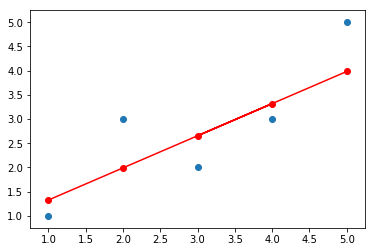

In [15]:
from matplotlib import pyplot as plt
plt.plot(x,y_hat, 'r')
plt.scatter(x, y_hat, c='r')
plt.scatter(x,y)

Use root mean squared error (RMSE) to calculate the error of the prediction: $\sqrt{\frac{\sum\left(\hat{y}-y\right)^{2}}{n}}=0.69$

In [6]:
epsilon = [(y_hat - y)**2 for y_hat, y in zip(y_hat, y)]
rms_error = round((sum(epsilon)/len(y))**.5,2)
print('RMSE: ', rms_error)

RMSE:  0.69


In [7]:
import pandas as pd 
data = pd.DataFrame(list(zip(x, y, y_hat)), columns=['x','actual y', 'predicted y'])
data

,x,actual y,predicted y
0,1,1,1.2
1,2,3,2.0
2,4,3,3.6
3,3,2,2.8
4,5,5,4.4


Use the Linear Regression model from sklearn to check whether it gives the same predictions. It can be seen that the $b_{0}$ and $b_{1}$ from the model are same as the previous calculations.

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
arr_x = np.array(x).reshape(-1,1)
model.fit(arr_x, y)
model_b_0 = round(model.intercept_, 2)
model_b_1 = model.coef_
print('b_0 value: ', model_b_0)
print('b_1 value: ', model_b_1)
predict_model_y = model.predict(arr_x)
predict_model_y
data['Predicted y new'] = pd.DataFrame(predict_model_y)
data

b_0 value:  0.4
b_1 value:  [0.8]


,x,actual y,predicted y,Predicted y new
0,1,1,1.2,1.2
1,2,3,2.0,2.0
2,4,3,3.6,3.6
3,3,2,2.8,2.8
4,5,5,4.4,4.4


### Linear Regression Tutorial Using Gradient Descent for Machine Learning
https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/

In [9]:
learning_rate = 0.01
epoch = 15
b_0 = 0.0
b_1 = 0.0
list_b_0  = []
list_b_1 = []
error_values = []


for epoch_value in range(epoch):
    for i in range(len(x)):
        y_hat = b_0 + b_1*x[i]
        error = y_hat - y[i]
        error_values.append(error)
        b_0 = b_0 - learning_rate * error
        b_1 = b_0 - learning_rate * error * x[i]
        list_b_0.append(b_0)
        list_b_1.append(b_1)

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

result = pd.DataFrame(list(zip(list_b_0, list_b_1)), columns = ('b_0','b_1'))
result.index += 1
print(result.tail())

         b_0       b_1
71  0.651487  0.647770
72  0.662016  0.683076
73  0.658073  0.642300
74  0.652223  0.634674
75  0.663967  0.722688


Text(0.5,1,'Error in each iteration')

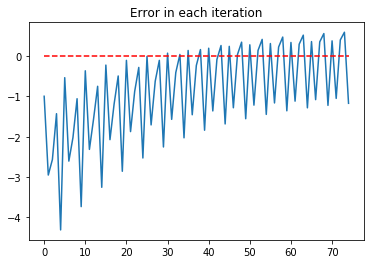

In [11]:
iteration = [i for i in range(len(error_values))]
plt.plot(error_values)
plt.plot(np.zeros(len(error_values)),'r--')
plt.title('Error in each iteration')

In [12]:
final_b_0 = list_b_0[-1]
final_b_1 = list_b_0[-1]
print('b_0, b_1 value in last iteration: ', [final_b_0, final_b_1])

b_0, b_1 value in last iteration:  [0.6639674327560081, 0.6639674327560081]


In [13]:
y_hat = [final_b_0 + final_b_1 * row for row in x]
predictions = pd.DataFrame(list(zip(x,y,y_hat)), columns = ('x', 'actual y', 'predicted y'))
predictions

,x,actual y,predicted y
0,1,1,1.327935
1,2,3,1.991902
2,4,3,3.319837
3,3,2,2.655870
4,5,5,3.983805


Text(0.5,1,'Actual VS Prediction')

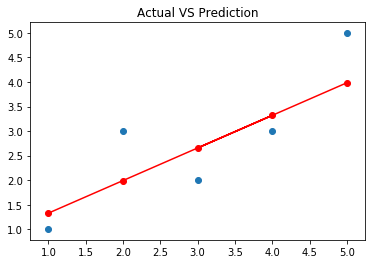

In [14]:
plt.scatter(x,y)
plt.plot(x,y_hat,'r')
plt.scatter(x,y_hat, c='r')
plt.title('Actual VS Prediction')